1. Загрузка корпуса
2. Пред обработка текста
2.1 Удаление стоп слов
2.2 Удаление пунктуации
2.3 Лемматизация слов
3. Создание словаря
4. Подбор оптимального количества тем
5. Визуализация кластеров

In [1]:
from google.colab import files

uploaded = files.upload()

Saving lady_mail.txt to lady_mail.txt


In [2]:
!pip install gensim
!pip install nltk
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 4.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=13224c7fcf0eddb7d462f25c5c4d50fc7ba26537a3dcc349df9a589dff915f2a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [3]:
import pandas as pd
df = pd.read_csv('lady_mail.txt')

In [4]:
df.head()

,text
0,Насыщенный интересный день. За любые дела вы ...
1,Будьте практичны. Этот день может положить на...
2,Благоприятный день. Если вы проявите инициати...
3,"Первая половина дня удачна. Вам часто везет, ..."
4,"Серьезных проблем этот день не приносит, но в..."


In [5]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from nltk.corpus import stopwords
import re, string
from nltk.stem.snowball import SnowballStemmer

russian_stopwords = stopwords.words("russian")# собираем стоп слова
regex = re.compile('[%s]' % re.escape(string.punctuation)) # компилим regexp выражение
stemmer = SnowballStemmer("russian") # инициализируем стэмминг

def preprocessing(text):
    text = regex.sub('', text) # удаляем пунктуацию
    text = [token for token in text.split() if token not in russian_stopwords] # Удаляем стоп слова
    text = [stemmer.stem(token) for token in text] # Выполняем стэмминг
    text = [token for token in text if token] # Удаляем пустые токены
    return ' '.join(text)

In [7]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [8]:
text_clean= []
for index, row in df.iterrows():
        text_clean.append(row['text'].split())

from gensim.models import Phrases
bigram = Phrases(text_clean) # Создаем биграммы на основе корпуса
trigram = Phrases(bigram[text_clean])# Создаем триграммы на основе корпуса

for idx in range(len(text_clean)):
  for token in bigram[text_clean[idx]]:
    if '_' in token:
      # Токен это би грамма, добавим в документ.
      text_clean[idx].append(token)
  for token in trigram[text_clean[idx]]:
    if '_' in token:
      # Токен это три грамма, добавим в документ.
      text_clean[idx].append(token)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [9]:
from gensim.corpora.dictionary import Dictionary
from numpy import array
dictionary = Dictionary(text_clean)
dictionary.filter_extremes(no_below=10, no_above=0.1)
#Создадим словарь и корпус для lda модели
corpus = [dictionary.doc2bow(doc) for doc in text_clean]
print('Количество уникальных токенов: %d' % len(dictionary))
print('Количество документов: %d' % len(corpus))

Количество уникальных токенов: 2956
Количество документов: 3708


In [10]:
from gensim.models.ldamulticore import LdaMulticore
model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=10)
model.show_topics()

[(0,
  '0.006*"представител_знак" + 0.006*"удачн_совпаден" + 0.006*"будет_возможн" + 0.005*"перв_половин" + 0.004*"в_эт" + 0.004*"хорош_новост" + 0.004*"доб_успех" + 0.003*"котор_последн" + 0.003*"последн_врем" + 0.003*"приятн_сюрприз"'),
 (1,
  '0.006*"представител_знак" + 0.005*"будет_шанс" + 0.004*"будет_возможн" + 0.004*"приятн_сюрприз" + 0.003*"имен_благодар" + 0.003*"нов_знаком" + 0.003*"некотор_представител" + 0.003*"хорош_новост" + 0.003*"перв_половин" + 0.003*"удачн_покупк"'),
 (2,
  '0.007*"эт_врем" + 0.007*"перв_половин" + 0.005*"будет_возможн" + 0.004*"личн_отношен" + 0.004*"необычн_предложен" + 0.004*"во_втор" + 0.004*"чащ_обычн" + 0.003*"котор_последн" + 0.003*"точк_зрен" + 0.003*"последн_врем"'),
 (3,
  '0.008*"представител_знак" + 0.005*"будет_возможн" + 0.005*"нужн_результат" + 0.005*"сам_разн" + 0.004*"хорош_новост" + 0.004*"эт_врем" + 0.004*"нача_дня" + 0.003*"доб_успех" + 0.003*"во_втор" + 0.003*"он_подход"'),
 (4,
  '0.006*"влиян_позитивн" + 0.006*"стар_знаком" + 0

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

<Figure size 432x288 with 0 Axes>

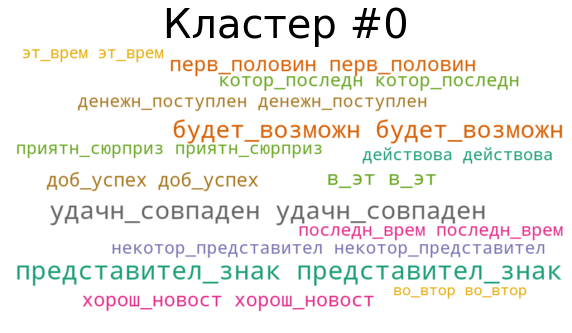

<Figure size 432x288 with 0 Axes>

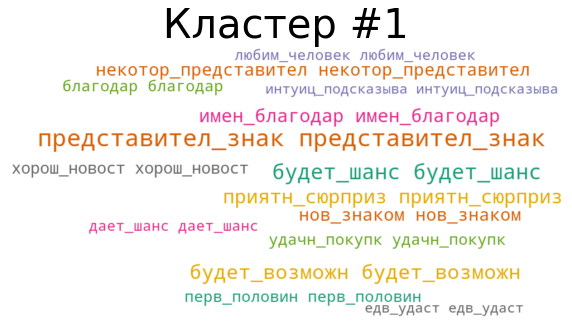

<Figure size 432x288 with 0 Axes>

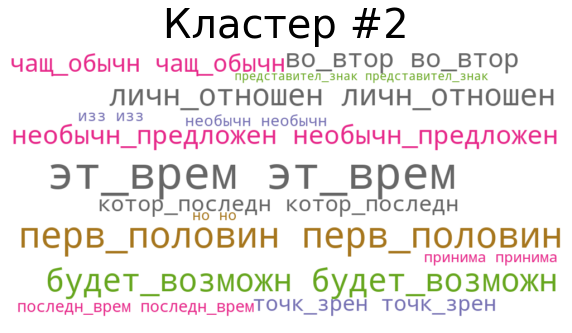

<Figure size 432x288 with 0 Axes>

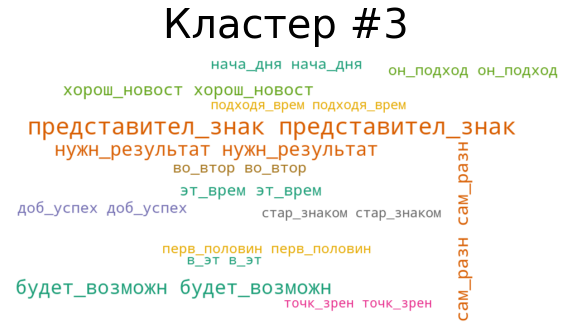

<Figure size 432x288 with 0 Axes>

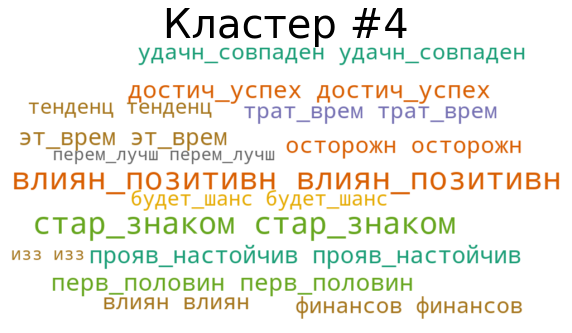

<Figure size 432x288 with 0 Axes>

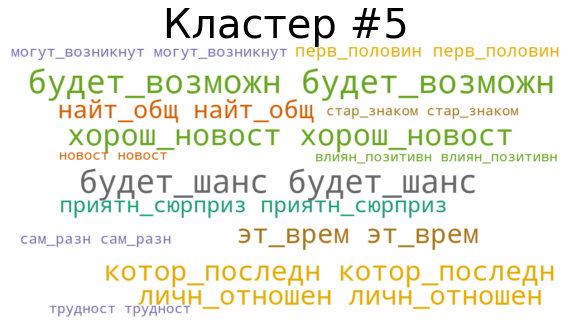

<Figure size 432x288 with 0 Axes>

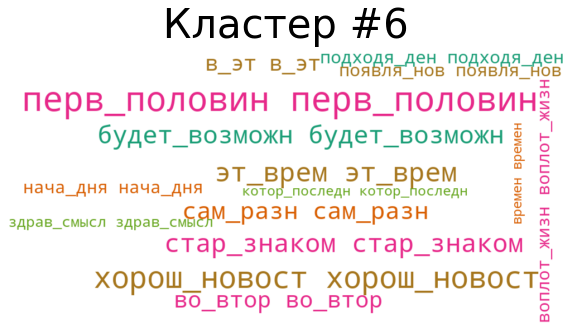

<Figure size 432x288 with 0 Axes>

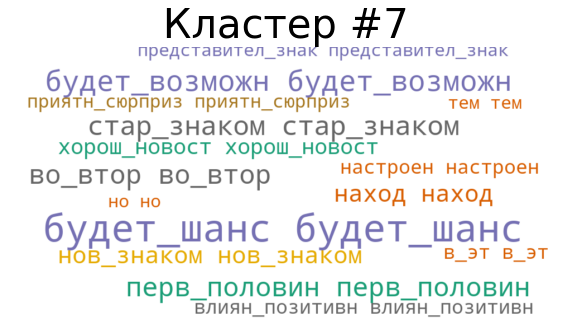

<Figure size 432x288 with 0 Axes>

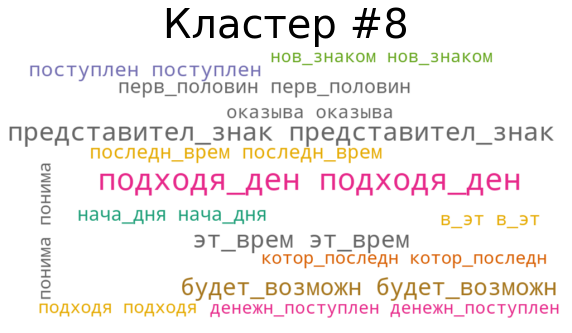

<Figure size 432x288 with 0 Axes>

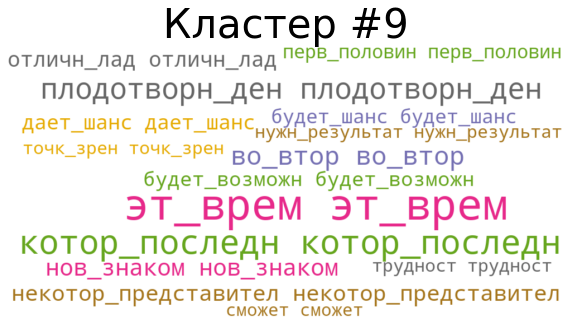

In [37]:
for t in range(model.num_topics):
  plt.figure()
  text_t = ''
  words_freq = model.show_topic(t, 15)
  for word_freq in words_freq:
    ii = int(10000 * word_freq[1])
    text_t = text_t + ii * (' ' + word_freq[0])
    wordcloud = WordCloud(background_color="white", width=1000, height=500,colormap='Dark2').generate(text_t)
  plt.figure(figsize=(10,7))
  plt.imshow(wordcloud, interpolation='bilinear',)
  plt.axis("off")
  plt.title("Кластер #" + str(t), fontsize=40)
  plt.show()

### Подбор оптимального числа кластеров для корпуса

In [ ]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model, corpus, dictionary)

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
	Подсчет c_v когерентности для различного количества тем
	dictionary : Gensim словарь
	corpus : Gensim корпус
	texts : Список текста
	limit : Максимальное количество тем
	
	model_list : Список LDA моделей
	coherence_values :Когерентности, соответствующие модели LDA с количеством тем
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
	
# Вызовем функцию и посчитаем
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_clean, start=2, limit=20, step=1)

Выходные данные были обрезаны до нескольких последних строк (5000).
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a dif

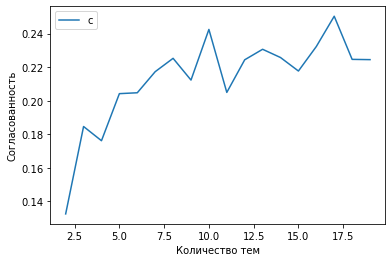

In [ ]:
import matplotlib.pyplot as plt
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Количество тем")
plt.ylabel("Согласованность")
plt.legend(("coherence_values"), loc='best')
plt.show()